# 3.8 推論の実施

- 本ファイルでは、学習させたPSPNetでセマンティックセグメンテーションを行います。


# 学習目標


1.	セマンティックセグメンテーションの推論を実装できるようになる


# 事前準備

- 学習させた重みパラメータ「pspnet50_30.pth」をフォルダ「weights」に用意する。

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch

# データセットを用意

In [ ]:
import sys

In [ ]:
sys.path.append('../semantic_segmentation/')
#後ろのスラッシュを忘れがち

In [ ]:
cd /content/drive/MyDrive/3_semantic_segmentation/

/content/drive/MyDrive/3_semantic_segmentation


In [ ]:
from utils.dataloader import make_datapath_list, DataTransform, VOCDataset


# ファイルパスリスト作成
rootpath = "../semantic_segmentation/data/VOCdevkit/VOC2012/"
train_img_list, train_anno_list, val_img_list, val_anno_list = make_datapath_list(
    rootpath=rootpath)

# Dataset作成
# (RGB)の色の平均値と標準偏差
color_mean = (0.485, 0.456, 0.406)
color_std = (0.229, 0.224, 0.225)

val_dataset = VOCDataset(val_img_list, val_anno_list, phase="val", transform=DataTransform(
    input_size=475, color_mean=color_mean, color_std=color_std))


ModuleNotFoundError: ignored

# ネットワークを用意

In [ ]:
from utils.pspnet import PSPNet

net = PSPNet(n_classes=2)

# 学習済みパラメータをロード
state_dict = torch.load("../semantic_segmentation/weights/pspnet50_30.pth",
                        map_location={'cuda:0': 'cpu'})
net.load_state_dict(state_dict)

print('ネットワーク設定完了：学習済みの重みをロードしました')


ネットワーク設定完了：学習済みの重みをロードしました


# 推論実行

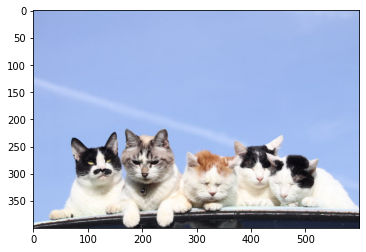

In [ ]:
# 1. 元画像の表示
image_file_path = "/content/drive/MyDrive/cat_5.jpg"
img_original = Image.open(image_file_path)   # [高さ][幅][色RGB]
img_width, img_height = img_original.size
plt.imshow(img_original)
plt.show()

In [ ]:
print(np.max(img_original))

255


In [ ]:
img_index = 5

In [ ]:
from torch.nn import functional as F

In [ ]:
# 3. PSPNetで推論する
net.eval()
# img, anno_class_img = val_dataset.__getitem__(img_index)

img = Image.open("/content/drive/MyDrive/cat_5.jpg")
im_list = np.asarray(img)
# x = img.unsqueeze(0)  # ミニバッチ化：torch.Size([1, 3, 475, 475])
im_list = torch.tensor(im_list)
im_list = im_list.permute(2,0,1)
im_list = im_list.unsqueeze(0)



x =  F.interpolate(im_list.to(torch.float), (475, 475), mode='bilinear', align_corners=False)

print(torch.std_mean(x))
# outputs = net(x)
# y = outputs[0]  # AuxLoss側は無視

(tensor(56.2139), tensor(183.3835))


In [ ]:
x = (x - torch.mean(x))/torch.std(x)

In [ ]:
outputs = net(x)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


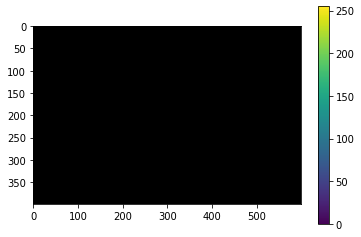

In [ ]:

# 4. PSPNetの出力から最大クラスを求め、カラーパレット形式にし、画像サイズを元に戻す
y = outputs[0]
y = y[0].detach().numpy()  # y：torch.Size([1, 21, 475, 475])
y = np.argmax(y, axis=0)
anno_class_img = Image.fromarray(np.uint8(y), mode="P")
anno_class_img = anno_class_img.resize((img_width, img_height), Image.NEAREST)
# anno_class_img.putpalette(p_palette)
plt.imshow(anno_class_img)

plt.colorbar()
plt.show()

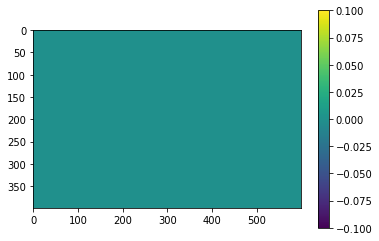

In [ ]:
plt.imshow(np.asarray(anno_class_img))
plt.colorbar()

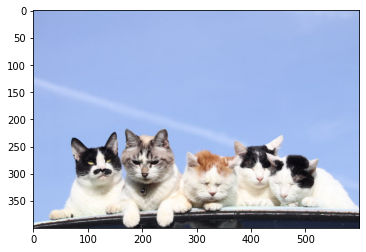

In [ ]:
# 1. 元画像の表示
image_file_path = "/content/drive/MyDrive/cat_5.jpg"
img_original = Image.open(image_file_path)   # [高さ][幅][色RGB]
img_width, img_height = img_original.size
plt.imshow(img_original)
plt.show()

In [ ]:
width, height = img.size
# オリジナル画像と同じサイズのImageオブジェクトを作成する
img2 = Image.new('RGB', (width, height))

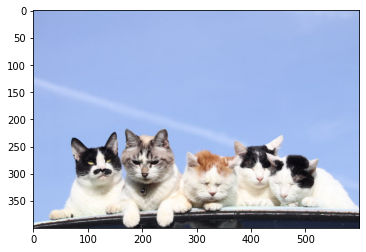

In [ ]:
im_list = np.asarray(img)
#貼り付け
plt.imshow(im_list)
#表示
plt.show()

In [ ]:
im_list = torch.tensor(im_list)
im_list = im_list.permute(2,0,1)
im_list = im_list.unsqueeze(0)

In [ ]:
im_list = im_list.permute(2,0,1)
im_list = im_list.unsqueeze(0)

In [ ]:
from torch.nn import functional as F

In [ ]:
resize_data = F.interpolate(im_list.to(torch.float), (475, 475), mode='bilinear', align_corners=False)


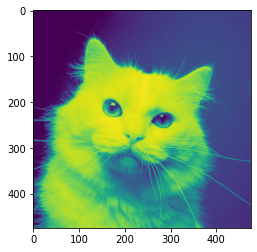

In [ ]:
plt.imshow(resize_data[0,0,:,:])

In [ ]:
net.eval()
outputs = net(resize_data)


0


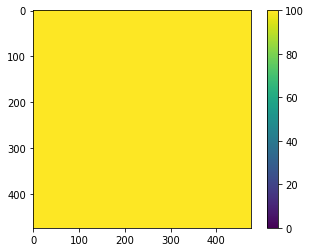

1


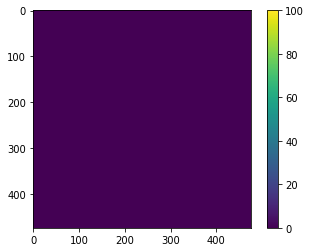

2


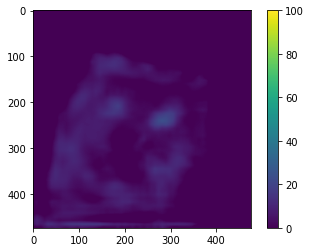

3


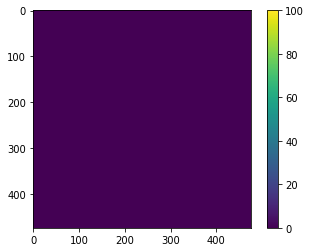

4


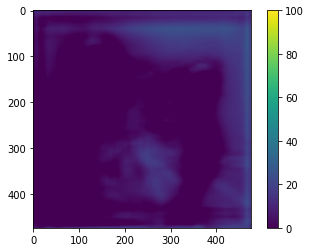

5


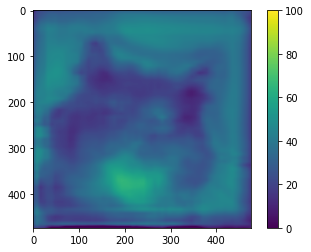

6


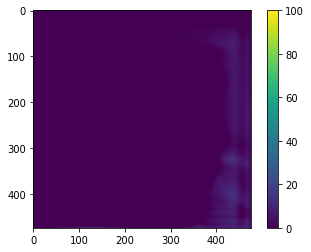

7


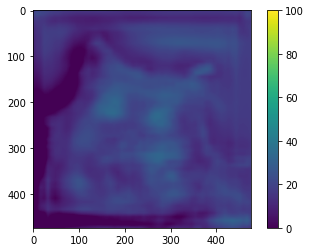

8


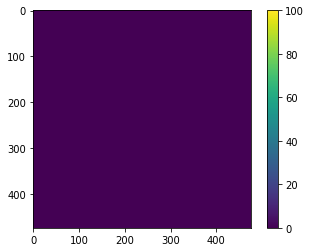

9


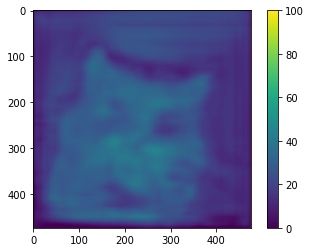

10


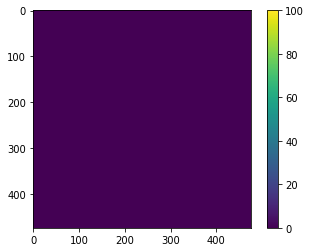

11


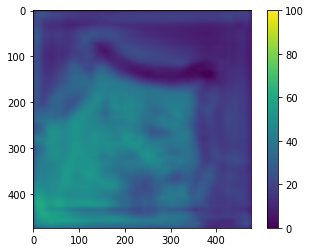

12


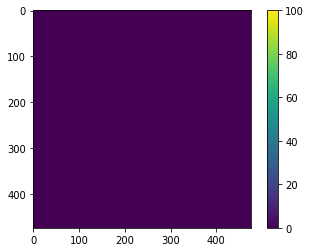

13


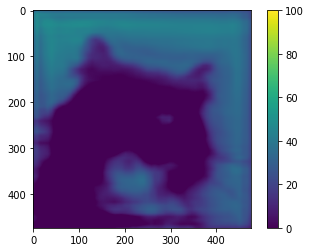

14


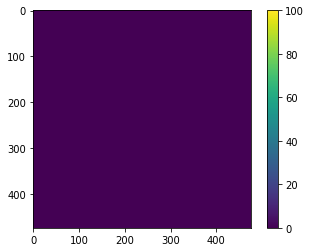

15


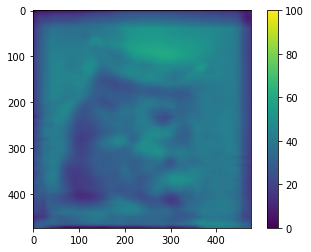

16


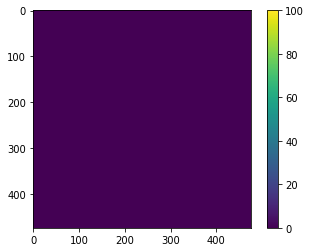

17


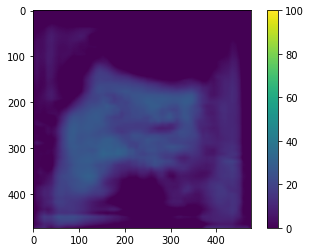

18


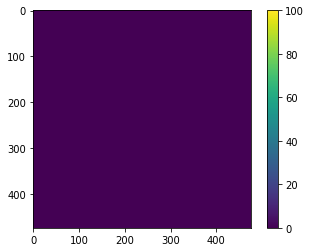

19


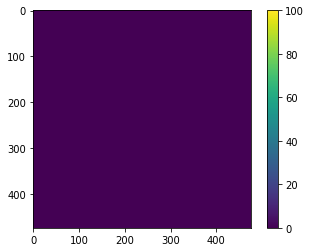

20


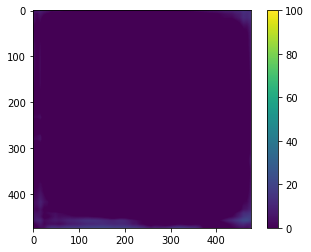

In [ ]:
for i in range(21):
  cat = outputs[0].detach().numpy()[:,i,:,:]
  cat = np.swapaxes(cat,0,1)
  cat = np.swapaxes(cat,1,2)
  print(i)
  plt.imshow(cat[:,:,0],vmin = 0, vmax = 100)
  plt.colorbar()
  plt.show()

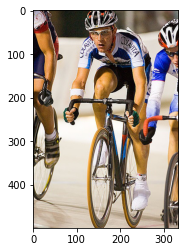

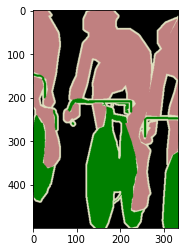

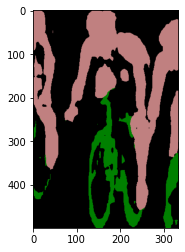

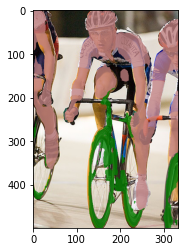

In [ ]:
img_index = 4

# 1. 元画像の表示
image_file_path = val_img_list[img_index]
img_original = Image.open(image_file_path)   # [高さ][幅][色RGB]
img_width, img_height = img_original.size
plt.imshow(img_original)
plt.show()

# 2. 正解アノテーション画像の表示
anno_file_path = val_anno_list[img_index]
anno_class_img = Image.open(anno_file_path)   # [高さ][幅][色RGB]
p_palette = anno_class_img.getpalette()
plt.imshow(anno_class_img)
plt.show()

# 3. PSPNetで推論する
net.eval()
img, anno_class_img = val_dataset.__getitem__(img_index)
x = img.unsqueeze(0)  # ミニバッチ化：torch.Size([1, 3, 475, 475])
outputs = net(x)
y = outputs[0]  # AuxLoss側は無視

# 4. PSPNetの出力から最大クラスを求め、カラーパレット形式にし、画像サイズを元に戻す
y = y[0].detach().numpy()  # y：torch.Size([1, 21, 475, 475])
y = np.argmax(y, axis=0)
anno_class_img = Image.fromarray(np.uint8(y), mode="P")
anno_class_img = anno_class_img.resize((img_width, img_height), Image.NEAREST)
anno_class_img.putpalette(p_palette)
plt.imshow(anno_class_img)
plt.show()

# 5. 画像を透過させて重ねる
trans_img = Image.new('RGBA', anno_class_img.size, (0, 0, 0, 0))
anno_class_img = anno_class_img.convert('RGBA')  # カラーパレット形式をRGBAに変換

for x in range(img_width):
    for y in range(img_height):
        # 推論結果画像のピクセルデータを取得
        pixel = anno_class_img.getpixel((x, y))
        r, g, b, a = pixel

        # (0, 0, 0)の背景ならそのままにして透過させる
        if pixel[0] == 0 and pixel[1] == 0 and pixel[2] == 0:
            continue
        else:
            # それ以外の色は用意した画像にピクセルを書き込む
            trans_img.putpixel((x, y), (r, g, b, 200))
            # 200は透過度の大きさを指定している

result = Image.alpha_composite(img_original.convert('RGBA'), trans_img)
plt.imshow(result)
plt.show()


以上